  Company Cleaned_Tweet Sentiment_Analysis
0  Amazon    amazon wtf           Negative
1  Amazon    amazon wtf           Negative
2  Amazon           wtf           Negative
3  Amazon           wtf           Negative
4  Amazon       unk wtf           Negative
Sentiment_Analysis  Negative  Neutral  Positive
Company                                        
Amazon                   620      262      1433
Facebook                1154      351       865
Google                   846      372      1080
Microsoft                734      526      1140


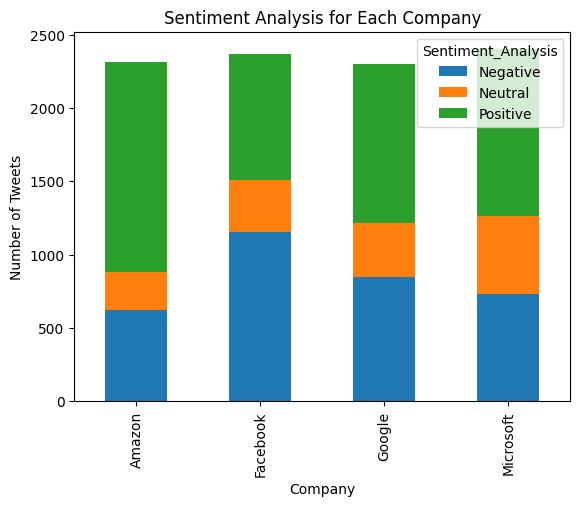

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.data.path.append(r'C:\Users\shiva\AppData\Roaming\nltk_data')  

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

df = pd.read_csv("D:\\DS Project\\Blank Twitter.csv", header=None, names=['ID', 'Company', 'Sentiment', 'Tweet'])  #

# Preprocess the tweets
def preprocess_tweet(tweet):
    if isinstance(tweet, str):  
        tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
        tweet = re.sub(r'@\w+|#', '', tweet)
        tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
        tweet = tweet.lower()  # Convert to lowercase
        tokens = word_tokenize(tweet)  # Tokenize
        tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stop words
        return ' '.join(tokens)
    else:
        return ''  # Return an empty string for non-valid tweets

# Apply preprocessing
df['Cleaned_Tweet'] = df['Tweet'].apply(preprocess_tweet)

companies_to_keep = ['Google', 'Microsoft', 'Facebook', 'Amazon']
df_filtered = df[df['Company'].isin(companies_to_keep)]

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def get_sentiment(tweet):
    scores = analyzer.polarity_scores(tweet)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis on the cleaned tweets
df_filtered['Sentiment_Analysis'] = df_filtered['Cleaned_Tweet'].apply(get_sentiment)

# Check the sentiment analysis results
print(df_filtered[['Company', 'Cleaned_Tweet', 'Sentiment_Analysis']].head())

# Aggregate Sentiment by Company
sentiment_summary = df_filtered.groupby(['Company', 'Sentiment_Analysis']).size().unstack(fill_value=0)
print(sentiment_summary)

# Visualize the Sentiment Distribution
import matplotlib.pyplot as plt

sentiment_summary.plot(kind='bar', stacked=True)
plt.title("Sentiment Analysis for Each Company")
plt.ylabel("Number of Tweets")
plt.show()


In [ ]:
print(df.head())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join(df['Cleaned_Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Tweet'])
y = df['Sentiment']  # Use the Sentiment column for labels

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Function to predict sentiment of new tweets
def predict_sentiment(tweet):
    cleaned_tweet = preprocess_tweet(tweet)
    vectorized_tweet = vectorizer.transform([cleaned_tweet])
    prediction = model.predict(vectorized_tweet)
    return prediction[0]

# Example usage
new_tweet = "new updates have made it worse"
print("Sentiment:", predict_sentiment(new_tweet))

In [ ]:
for company in companies_to_keep:
    company_tweets = df_filtered[df_filtered['Company'] == company]['Cleaned_Tweet']
    all_words = ' '.join(company_tweets)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {company}")
    plt.show()

In [ ]:
from collections import Counter

# Get the most common words
all_words = ' '.join(df_filtered['Cleaned_Tweet'])
word_counts = Counter(all_words.split())
common_words = word_counts.most_common(10)

# Create a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plotting the most common words
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='Word', y='Count')
plt.title('Most Common Words in Tweets')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Plotting sentiment distribution by company
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Company', hue='Sentiment_Analysis')
plt.title('Sentiment Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is the dataframe you're using for plotting
# Map sentiment categories to numeric values
sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df_filtered['Sentiment_Numeric'] = df_filtered['Sentiment'].map(sentiment_mapping)

# Create the violin plot with a color gradient
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtered, x='Company', y='Sentiment_Numeric', inner='quartile', palette='coolwarm')
plt.title('Violin Plot of Sentiment Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

